In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('df.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
df.shape

(545, 13)

In [11]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

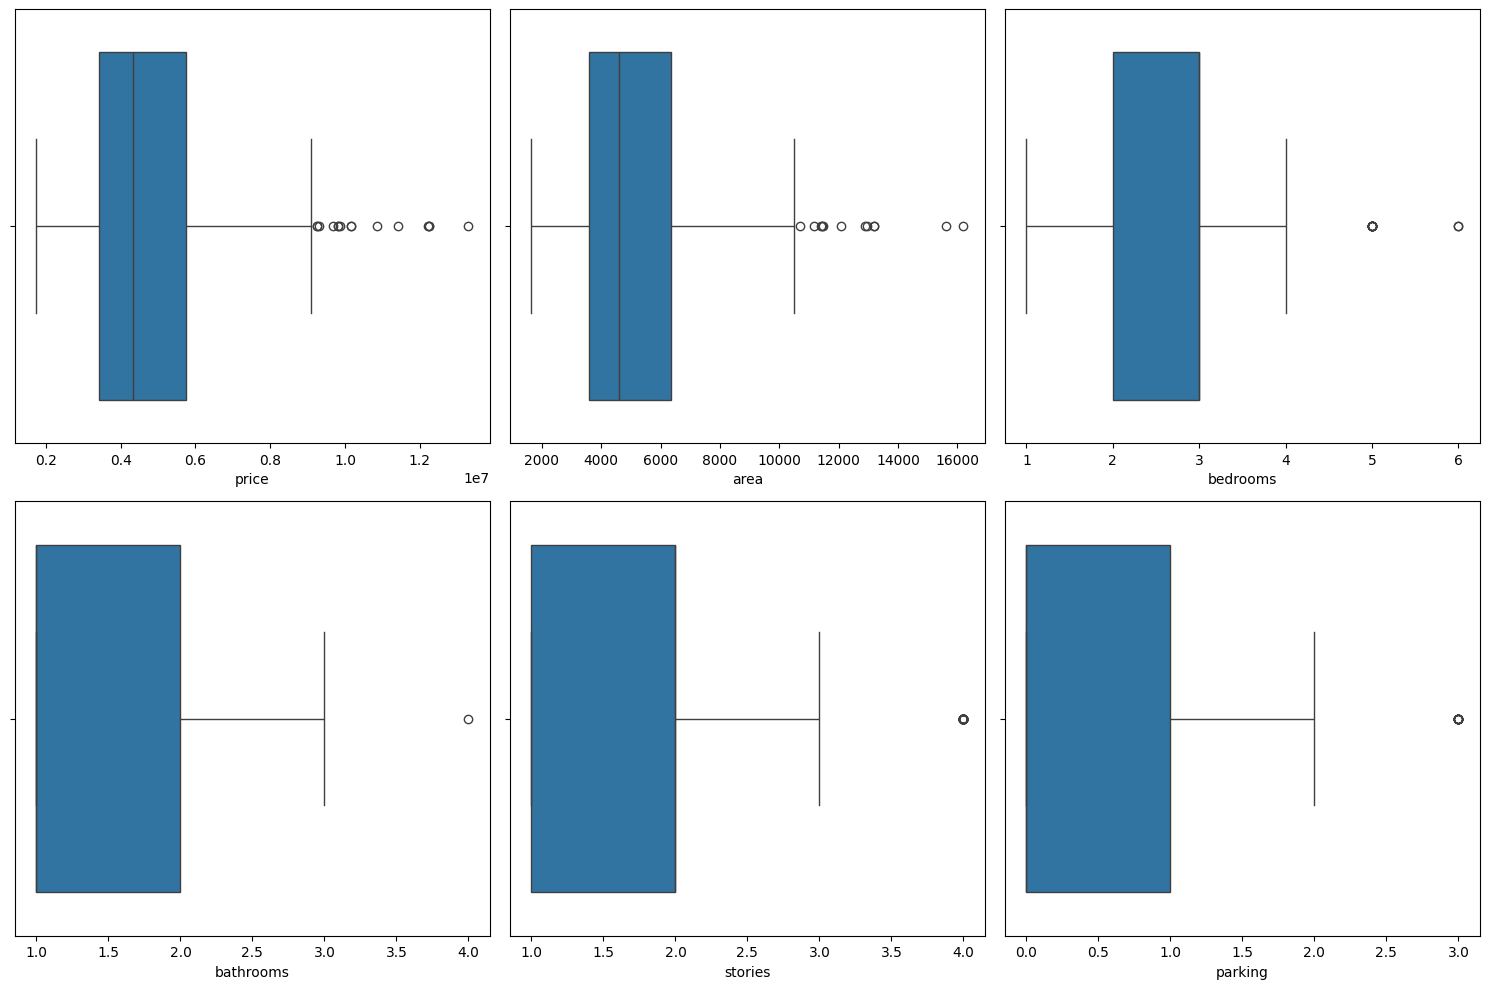

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(15, 10))  # Adjusted figsize for clarity

sns.boxplot(x=df['price'], ax=axs[0, 0])
sns.boxplot(x=df['area'], ax=axs[0, 1])
sns.boxplot(x=df['bedrooms'], ax=axs[0, 2])
sns.boxplot(x=df['bathrooms'], ax=axs[1, 0])
sns.boxplot(x=df['stories'], ax=axs[1, 1])
sns.boxplot(x=df['parking'], ax=axs[1, 2])

plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x152f74835c0>,
 'caps': [<matplotlib.lines.Line2D at 0x152f74acc20>,
 'boxes': [<matplotlib.lines.Line2D at 0x152f7409790>],
 'medians': [<matplotlib.lines.Line2D at 0x152f74ad220>],
 'fliers': [<matplotlib.lines.Line2D at 0x152f74ad4f0>],
 'means': []}

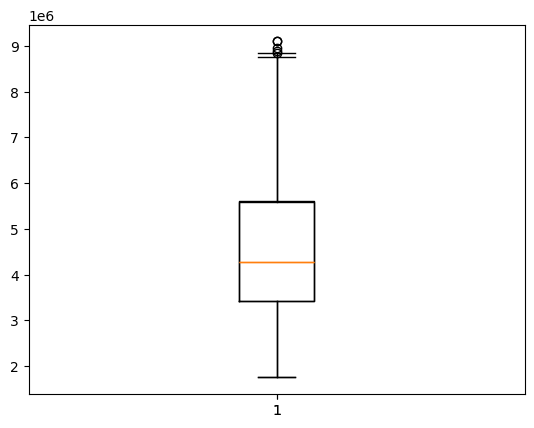

In [19]:
# Removing outliers from Price and Area columns
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]
plt.boxplot(df.price)

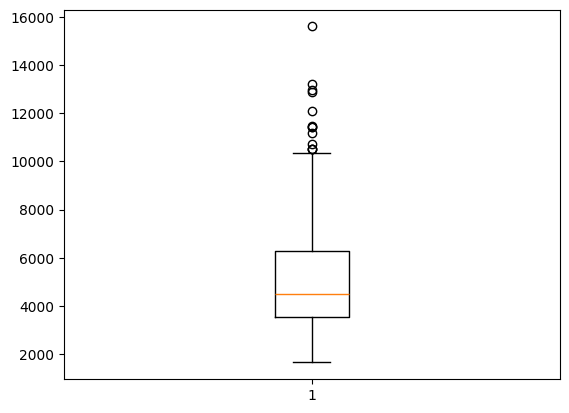

In [20]:
# outlier treatment for area
plt.boxplot(df.area)
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]

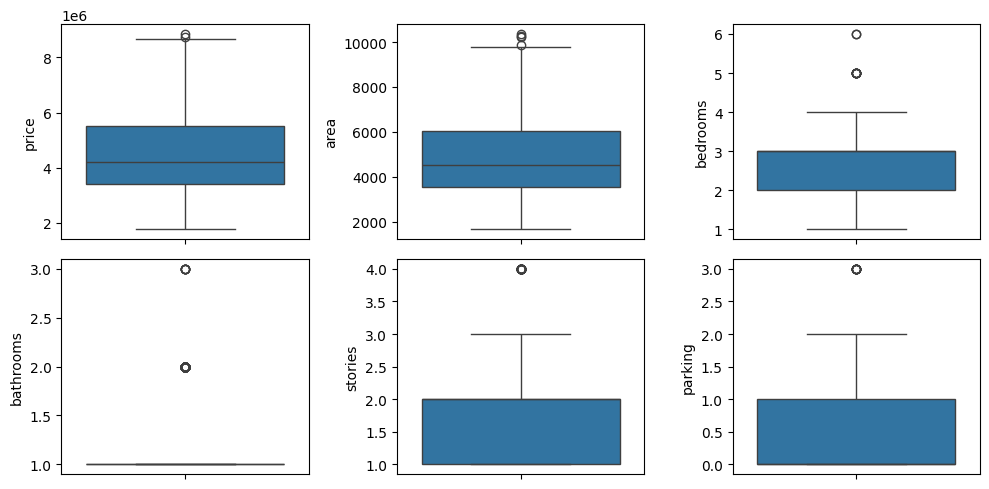

In [22]:
# Outlier Analysis
housing = df
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

In [23]:
# Exploratory Data Analytics

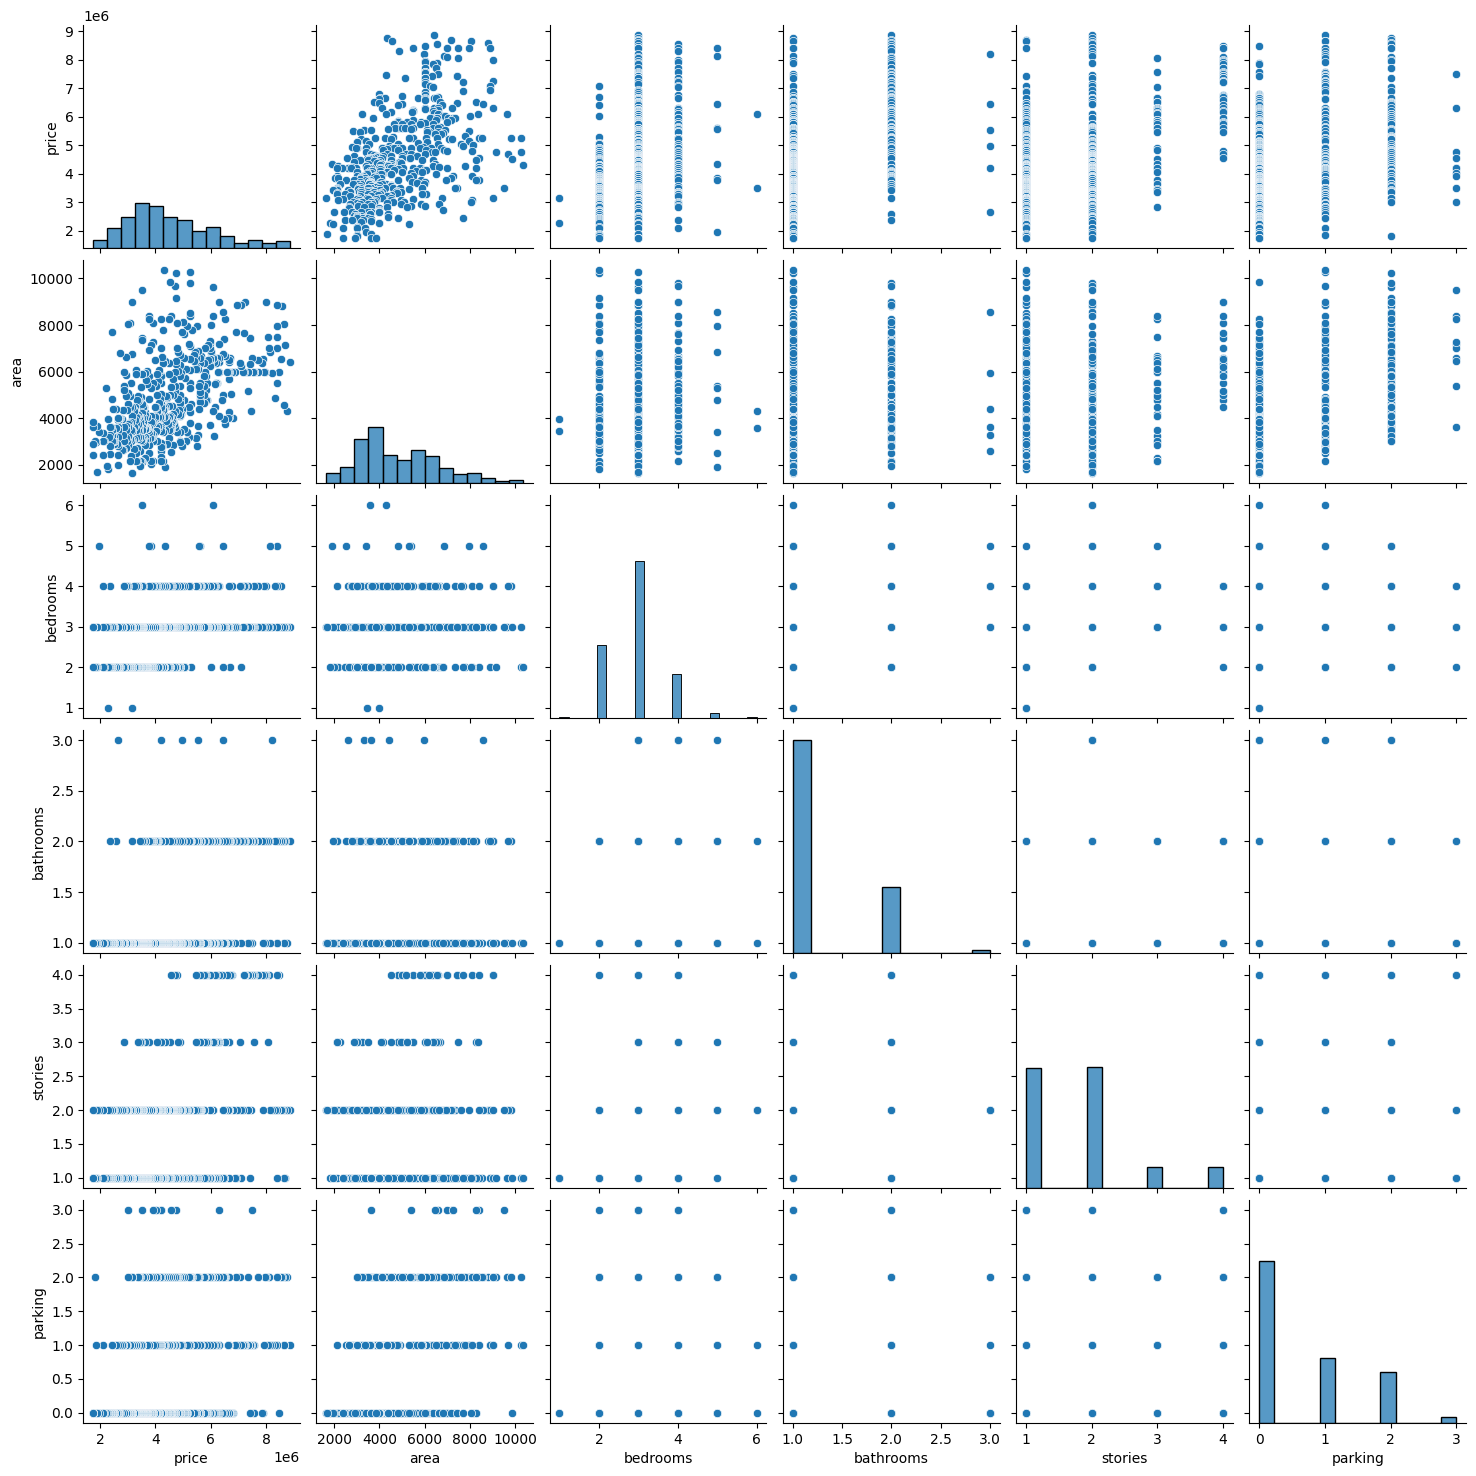

In [24]:
sns.pairplot(housing)
plt.show()

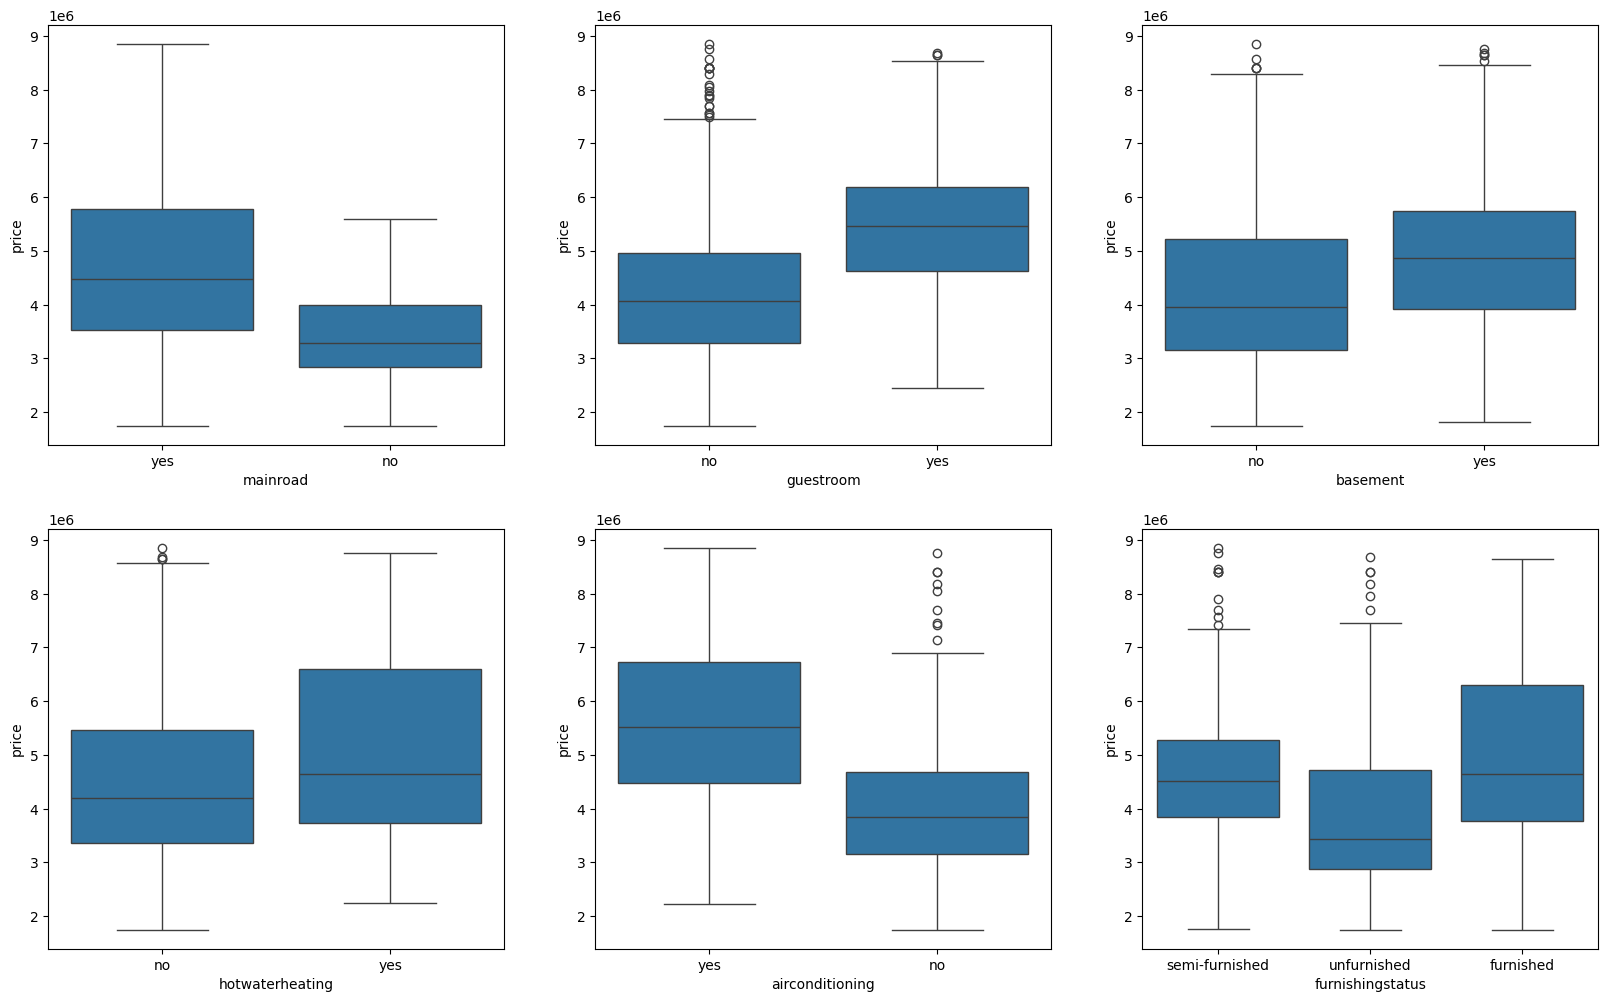

In [25]:
# View the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

In [26]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished
20,8750000,4320,3,1,2,yes,no,yes,yes,no,2,no,semi-furnished
21,8680000,7155,3,2,1,yes,yes,yes,no,yes,2,no,unfurnished
22,8645000,8050,3,1,1,yes,yes,yes,no,yes,1,no,furnished
23,8645000,4560,3,2,2,yes,yes,yes,no,yes,1,no,furnished


In [29]:
# Convert categorical values with 'yes' or 'no' into 1/0 (Label Encoding)
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

cat_x = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

def cat_to_num(col_name):
    df[col_name] = label_encoder.fit_transform(df[col_name])

for col in cat_x:
    cat_to_num(col)

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,1
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,2
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,0
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,0


In [32]:
# Split data into train and test
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

Rescaling the Features
As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:



#### Using MinMax Scaling (Scale values into -1 -> 1)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
506,0.120197,0.139723,0.2,0.0,0.000000,0,0,0,0,0,0.000000,0,2
99,0.635468,0.496536,0.6,0.0,0.666667,1,1,1,0,0,0.000000,1,2
193,0.462069,0.357968,0.2,0.0,0.000000,1,1,1,0,0,0.000000,0,1
189,0.463054,0.212471,0.2,0.0,0.000000,0,1,1,0,0,0.000000,0,1
108,0.613300,0.177829,0.6,0.0,0.666667,1,0,0,0,0,0.333333,0,1


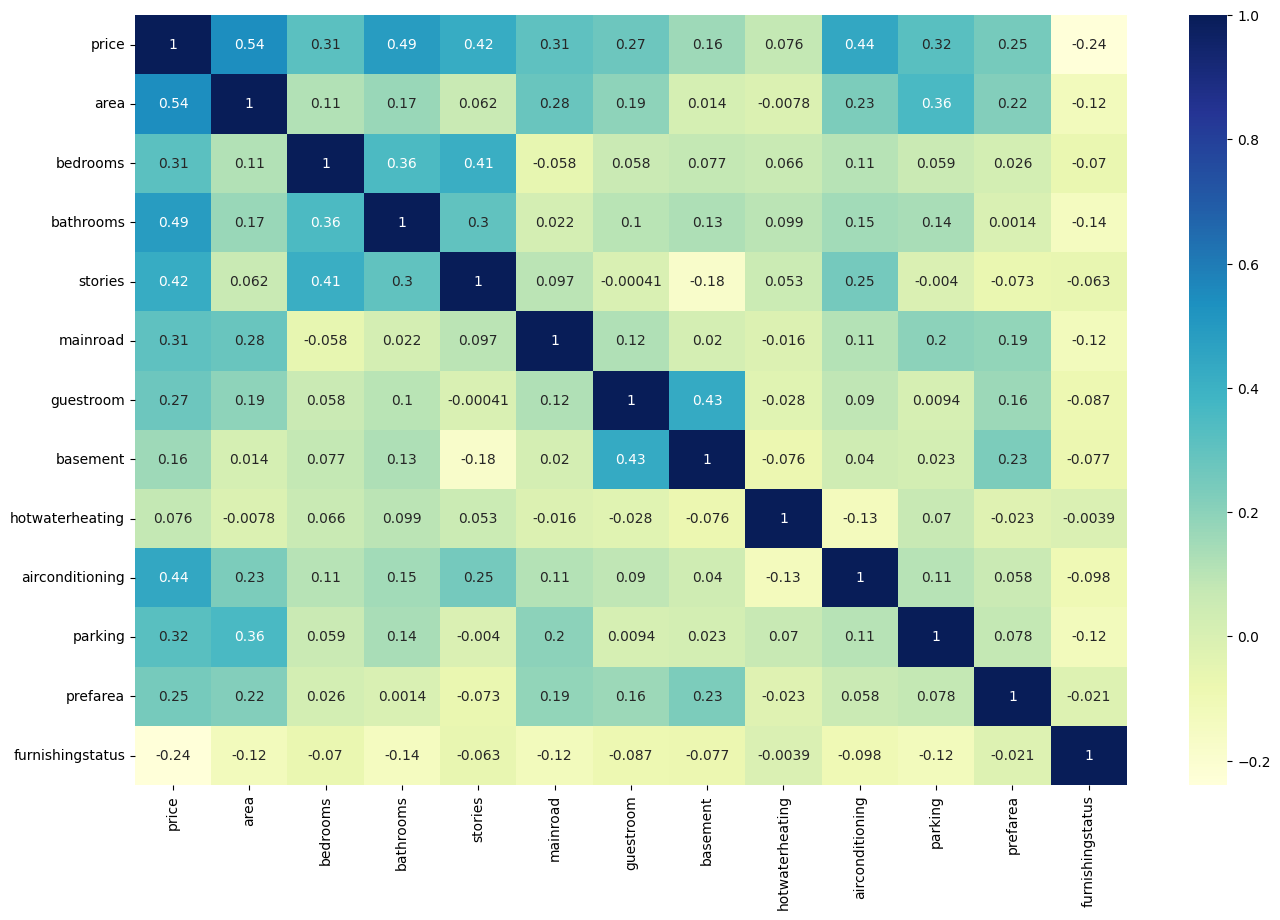

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [41]:
y_train = df_train.pop('price')
X_train = df_train

In [42]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
y_test = df_test.pop('price')
X_test = df_test

In [44]:
# Making predictions
y_pred = lr.predict(X_test)

In [45]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

-8.13099932294438

Text(0, 0.5, 'y_pred')

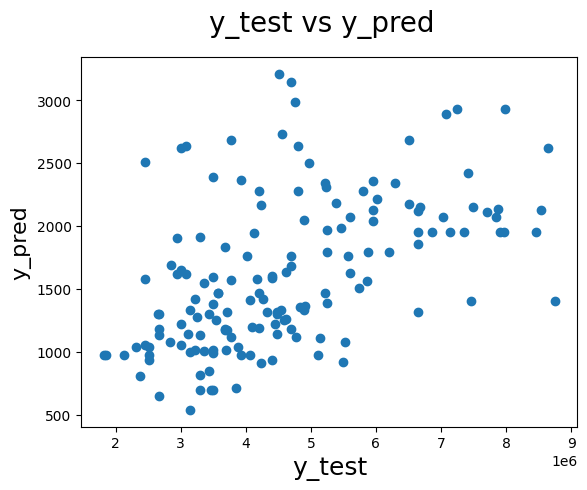

In [46]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label